# Predicting the death by cancer rate for US counties


# Notebook 1A - Preprocessing:

###                                           Data cleaning, univariate and bivariate analysis

# Problem definition

Predicting the death by cancer rate for US counties.

In [1]:
import sys

print(sys.version)

3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)]


# 1. Loading the dataset


The original location of the file:

https://data.world/nrippner/ols-regression-challenge/file/cancer_reg.csv

**Data Dictionary**

**TARGET_deathRate:** Dependent variable. Mean per capita (100,000) cancer mortalities(a)

**avgAnnCount:** Mean number of reported cases of cancer diagnosed annually(a)

**avgDeathsPerYear:** Mean number of reported mortalities due to cancer(a)

**incidenceRate:** Mean per capita (100,000) cancer diagoses(a)

**medianIncome:** Median income per county (b)

**popEst2015:** Population of county (b)

**povertyPercent:** Percent of populace in poverty (b)

**studyPerCap:** Per capita number of cancer-related clinical trials per county (a)

**binnedInc:** Median income per capita binned by decile (b)

**MedianAge:** Median age of county residents (b)

**MedianAgeMale:** Median age of male county residents (b)

**MedianAgeFemale:** Median age of female county residents (b)

**Geography:** County name (b)

**AvgHouseholdSize:** Mean household size of county (b)

**PercentMarried:** Percent of county residents who are married (b)

**PctNoHS18_24:** Percent of county residents ages 18-24 highest education attained: less than high school (b)

**PctHS18_24:** Percent of county residents ages 18-24 highest education attained: high school diploma (b)

**PctSomeCol18_24:** Percent of county residents ages 18-24 highest education attained: some college (b)

**PctBachDeg18_24:** Percent of county residents ages 18-24 highest education attained: bachelor's degree (b)

**PctHS25_Over:** Percent of county residents ages 25 and over highest education attained: high school diploma (b)

**PctBachDeg25_Over:** Percent of county residents ages 25 and over highest education attained: bachelor's degree (b)

**PctEmployed16_Over:** Percent of county residents ages 16 and over employed (b)

**PctUnemployed16_Over:** Percent of county residents ages 16 and over unemployed (b)

**PctPrivateCoverage:** Percent of county residents with private health coverage (b)

**PctPrivateCoverageAlone:** Percent of county residents with private health coverage alone (no public assistance) (b)

**PctEmpPrivCoverage:** Percent of county residents with employee-provided private health coverage (b)

**PctPublicCoverage:** Percent of county residents with government-provided health coverage (b)

**PctPubliceCoverageAlone:** Percent of county residents with government-provided health coverage alone (b)

**PctWhite:** Percent of county residents who identify as White (b)

**PctBlack:** Percent of county residents who identify as Black (b)

**PctAsian:** Percent of county residents who identify as Asian (b)

**PctOtherRace:** Percent of county residents who identify in a category which is not White, Black, or Asian (b)

**PctMarriedHouseholds:** Percent of married households (b)

**BirthRate:** Number of live births relative to number of women in county (b)

(a): years 2010-2016

(b): 2013 Census Estimates

https://data.world/nrippner/ols-regression-challenge

In [2]:
import numpy as np
import pandas as pd

cancer_df = pd.DataFrame(pd.read_csv("C:\\Users\\skent\\OneDrive\\Documents\\1. GradDip Data Science UA\\5. Python B\\Assessments\\Ass 2\\Datasets\\cancer_reg.csv"))
cancer_df.head()                 

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,...,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,...,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,...,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,...,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,...,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657


In [3]:
cancer_df.shape

(3047, 34)

**Checking data types**

In [4]:
cancer_df.dtypes

avgAnnCount                float64
avgDeathsPerYear             int64
TARGET_deathRate           float64
incidenceRate              float64
medIncome                    int64
popEst2015                   int64
povertyPercent             float64
studyPerCap                float64
binnedInc                   object
MedianAge                  float64
MedianAgeMale              float64
MedianAgeFemale            float64
Geography                   object
AvgHouseholdSize           float64
PercentMarried             float64
PctNoHS18_24               float64
PctHS18_24                 float64
PctSomeCol18_24            float64
PctBachDeg18_24            float64
PctHS25_Over               float64
PctBachDeg25_Over          float64
PctEmployed16_Over         float64
PctUnemployed16_Over       float64
PctPrivateCoverage         float64
PctPrivateCoverageAlone    float64
PctEmpPrivCoverage         float64
PctPublicCoverage          float64
PctPublicCoverageAlone     float64
PctWhite            

# 2. Pre-processing the dataset

## a. Cleaning

**Creating a copy of cancer_df to make changes to**

In [5]:
cancer_1 = cancer_df.copy()

**All variables are the correct type**

If they were not then the astype(<type>) function could be used. E.g. if I preferred the 'avgAnnCount' to be an integer rather than a float, I would use the code below:

cancer_1.avgAnnCount  =  cancer_1.avgAnnCount.astype( 'int64' )
    
**The categorical variables will be converted to numerical before the modelling process as further cleaning is necessary on these varibles before they are ready for use.**

### Exploring the dataset

In [6]:
cancer_1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
avgAnnCount,3047.0,606.338544,1416.356223,6.000000,76.000000,171.000000,518.000000,3.815000e+04
avgDeathsPerYear,3047.0,185.965868,504.134286,3.000000,28.000000,61.000000,149.000000,1.401000e+04
TARGET_deathRate,3047.0,178.664063,27.751511,59.700000,161.200000,178.100000,195.200000,3.628000e+02
incidenceRate,3047.0,448.268586,54.560733,201.300000,420.300000,453.549422,480.850000,1.206900e+03
medIncome,3047.0,47063.281917,12040.090836,22640.000000,38882.500000,45207.000000,52492.000000,1.256350e+05
popEst2015,3047.0,102637.370528,329059.220504,827.000000,11684.000000,26643.000000,68671.000000,1.017029e+07
povertyPercent,3047.0,16.878175,6.409087,3.200000,12.150000,15.900000,20.400000,4.740000e+01
studyPerCap,3047.0,155.399415,529.628366,0.000000,0.000000,0.000000,83.650776,9.762309e+03
MedianAge,3047.0,45.272333,45.304480,22.300000,37.700000,41.000000,44.000000,6.240000e+02
MedianAgeMale,3047.0,39.570725,5.226017,22.400000,36.350000,39.600000,42.500000,6.470000e+01


Some variables have less than count = 3047, suggesting missing or na values.

* PctSomeCol18_24 = less than 3047 count
* PctEmployed16_Over = less than 3047 count
* PctPrivateCoverageAlone = less than 3047 count

There are some obvious potential outliers in variables:

* avgAnnCount.max = 38150
* avgDeathsPerYear.max = 14010
* studyPerCap.max = 9762.3
* MedianAge.max = 624
* BirthRate.max = 21.33


## Checking for missing values

In [7]:
cancer_1.isnull().sum()

avgAnnCount                   0
avgDeathsPerYear              0
TARGET_deathRate              0
incidenceRate                 0
medIncome                     0
popEst2015                    0
povertyPercent                0
studyPerCap                   0
binnedInc                     0
MedianAge                     0
MedianAgeMale                 0
MedianAgeFemale               0
Geography                     0
AvgHouseholdSize              0
PercentMarried                0
PctNoHS18_24                  0
PctHS18_24                    0
PctSomeCol18_24            2285
PctBachDeg18_24               0
PctHS25_Over                  0
PctBachDeg25_Over             0
PctEmployed16_Over          152
PctUnemployed16_Over          0
PctPrivateCoverage            0
PctPrivateCoverageAlone     609
PctEmpPrivCoverage            0
PctPublicCoverage             0
PctPublicCoverageAlone        0
PctWhite                      0
PctBlack                      0
PctAsian                      0
PctOther

PctSomeCol18_24 has 2285 na values. This is 75% of the data. It is best ot remove this variable.

PctEmployed16_Over has 152 na values, which is only 5% of the data. The na data will be replaced with the column mean.

PctPrivateCoverageAlone has 609 na values, which is 20% of the data. The na data will be replaced with the column mean.

#### Dropping the variable 'PctSomeCol18_24' and replacing the na values with the variable mean in 'PctEmployed16_Over' and 'PctPrivateCoverageAlone'

In [8]:
cancer_1.drop(columns = ['PctSomeCol18_24'], inplace=True)

In [9]:
cancer_1.fillna(cancer_1.mean(), inplace = True)

In [10]:
cancer_1.isnull().sum()

avgAnnCount                0
avgDeathsPerYear           0
TARGET_deathRate           0
incidenceRate              0
medIncome                  0
popEst2015                 0
povertyPercent             0
studyPerCap                0
binnedInc                  0
MedianAge                  0
MedianAgeMale              0
MedianAgeFemale            0
Geography                  0
AvgHouseholdSize           0
PercentMarried             0
PctNoHS18_24               0
PctHS18_24                 0
PctBachDeg18_24            0
PctHS25_Over               0
PctBachDeg25_Over          0
PctEmployed16_Over         0
PctUnemployed16_Over       0
PctPrivateCoverage         0
PctPrivateCoverageAlone    0
PctEmpPrivCoverage         0
PctPublicCoverage          0
PctPublicCoverageAlone     0
PctWhite                   0
PctBlack                   0
PctAsian                   0
PctOtherRace               0
PctMarriedHouseholds       0
BirthRate                  0
dtype: int64

Comment:

**Creating another copy of the dataframe**

In [11]:
cancer_2 = cancer_1.copy()

### Histogram plots of variables with potential outliers

**'Average annual count' - mean number of reported cases of cancer diagnosed annually**

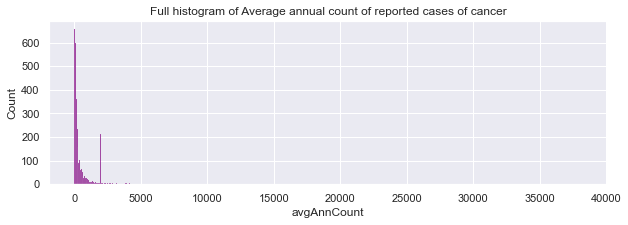

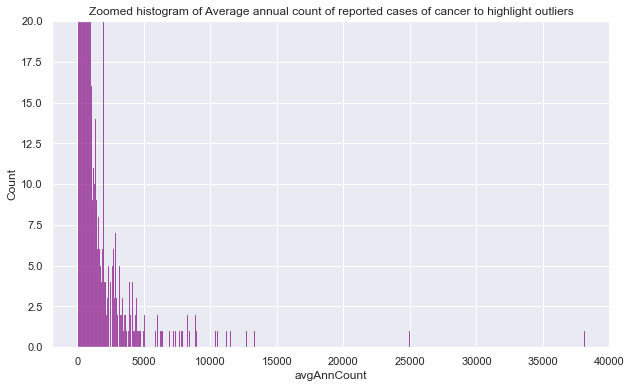

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="darkgrid")

fig = plt.figure(figsize=(10, 3))

sns.histplot(data=cancer_2, x="avgAnnCount",  color="purple")
plt.title("Full histogram of Average annual count of reported cases of cancer")
plt.show()

fig = plt.figure(figsize=(10, 6))

sns.histplot(data=cancer_2, x="avgAnnCount",  color="purple")
plt.ylim(bottom=0, top=20)
plt.title("Zoomed histogram of Average annual count of reported cases of cancer to highlight outliers")
plt.show()

There are 2 obvious outliers at approx. 25000 and 38150. Let's remove these values.

In [13]:
cancer_2 = cancer_2[(cancer_2.avgAnnCount < 15000)]
cancer_2.avgAnnCount.max()

14477.0

**Mean deaths per year**

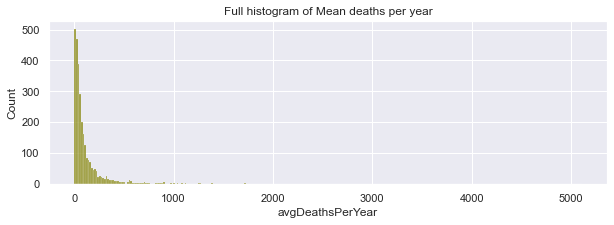

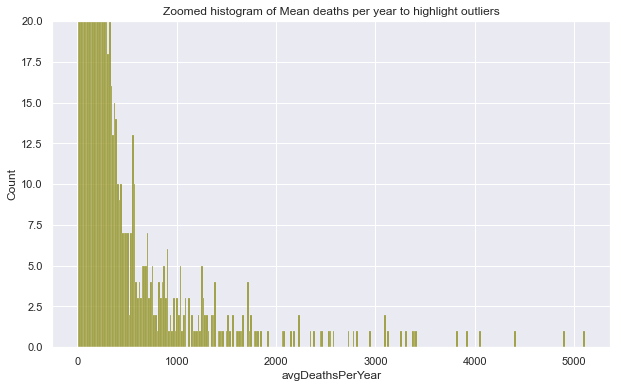

In [14]:
fig = plt.figure(figsize=(10, 3))

sns.histplot(data=cancer_2, x="avgDeathsPerYear",  color="olive")
plt.title("Full histogram of Mean deaths per year")
plt.show()

fig = plt.figure(figsize=(10, 6))

sns.histplot(data=cancer_2, x="avgDeathsPerYear",  color="olive")
plt.ylim(bottom=0, top=20)
plt.title("Zoomed histogram of Mean deaths per year to highlight outliers")
plt.show()

There are 2 obvious outliers at approx. 9200 and 14010. Let's remove anything above 6000.

In [15]:
cancer_2 = cancer_2[(cancer_2.avgDeathsPerYear < 6000)]
cancer_2.avgDeathsPerYear.max()

5108

**Per capita number of cancer - related clinical trials per county**

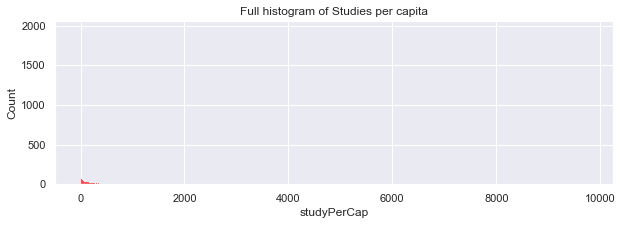

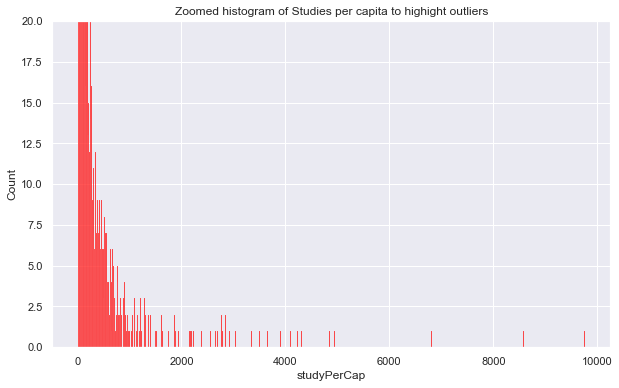

In [16]:
fig = plt.figure(figsize=(10, 3))

sns.histplot(data=cancer_2, x="studyPerCap",  color="red")
plt.title("Full histogram of Studies per capita")
plt.show()


fig = plt.figure(figsize=(10, 6))

sns.histplot(data=cancer_2, x="studyPerCap",  color="red")
plt.ylim(bottom=0, top=20)
plt.title("Zoomed histogram of Studies per capita to highight outliers")
plt.show()

There are 3 obvious outliers at approx. 6800, 9500 and 9762. Let's remove any entries greater than 6000.

In [17]:
cancer_2 = cancer_2[(cancer_2.studyPerCap < 6000)]
cancer_2.studyPerCap.max()

4938.271605

**Median Age**

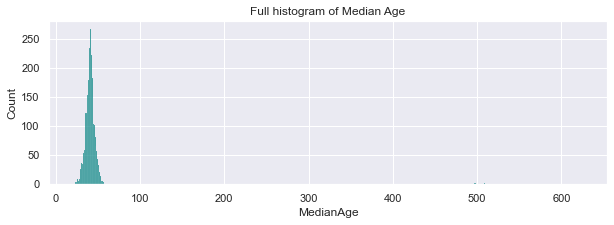

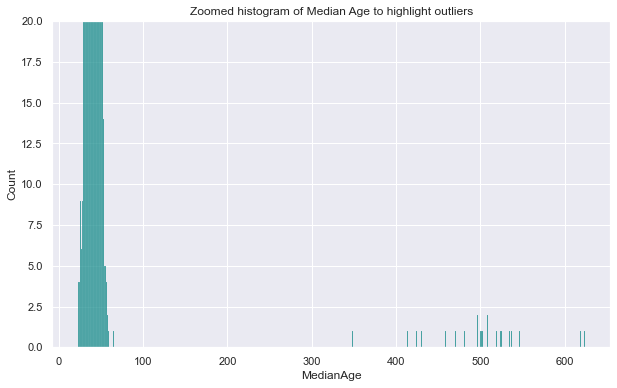

In [18]:
fig = plt.figure(figsize=(10, 3))

sns.histplot(data=cancer_2, x="MedianAge",  color="teal")
plt.title("Full histogram of Median Age")
plt.show()

fig = plt.figure(figsize=(10, 6))

sns.histplot(data=cancer_2, x="MedianAge",  color="teal")
plt.ylim(bottom=0, top=20)
plt.title("Zoomed histogram of Median Age to highlight outliers")
plt.show()

Obvious outliers appear in this variable. Lets filter out values > 100

In [19]:
cancer_2 = cancer_2[(cancer_2.MedianAge < 100)]
cancer_2.MedianAge.max()

65.3

**Birth rate - Number of live births relative to number of women in county**

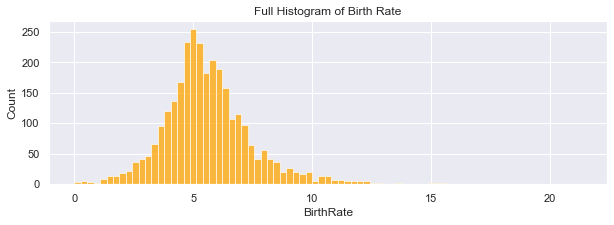

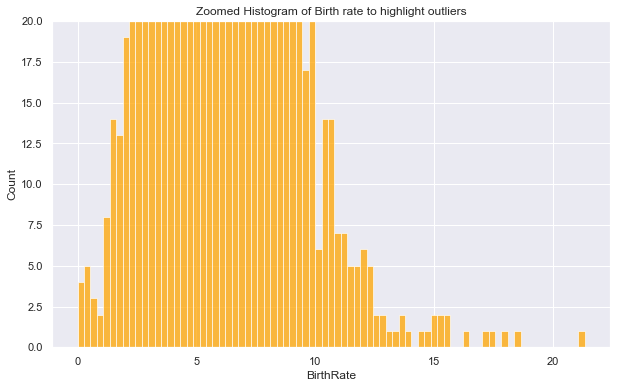

In [20]:
fig = plt.figure(figsize=(10, 3))

sns.histplot(data=cancer_2, x="BirthRate",  color="orange")
plt.title("Full Histogram of Birth Rate")
plt.show()


fig = plt.figure(figsize=(10, 6))

sns.histplot(data=cancer_2, x="BirthRate",  color="orange")
plt.ylim(bottom=0, top=20)
plt.title("Zoomed Histogram of Birth rate to highlight outliers")
plt.show()

There is an obvious outlier at 21.36. Let's remove this.

In [21]:
cancer_2 = cancer_2[(cancer_2.BirthRate < 20)]
cancer_2.BirthRate.max()

18.55670103

#### creating another copy

In [22]:
cancer_3 = cancer_2.copy()

## b. Dealing with categorical variables

#### Split 'Geography' column into 'County' and 'State' by delimiter

In [23]:
cancer_3[['County', 'State']] = cancer_3['Geography'].str.split(',', expand=True)
# display the new columns
cancer_3.iloc[:,30:].head()

,PctOtherRace,PctMarriedHouseholds,BirthRate,County,State
0,1.843479,52.856076,6.118831,Kitsap County,Washington
1,3.741352,45.372500,4.333096,Kittitas County,Washington
2,2.747358,54.444868,3.729488,Klickitat County,Washington
3,1.362643,51.021514,4.603841,Lewis County,Washington
4,0.492135,54.027460,6.796657,Lincoln County,Washington


**Dropping 'Geography'column as it is not necessary. 'County' is simply an ID column so will be removed**

In [24]:
cancer_3.drop(columns = ['Geography'], inplace=True)

In [25]:
cancer_3.drop(columns = ['County'], inplace=True)

In [26]:
# checking that the shape is as expected
cancer_3.shape

(3009, 33)

In [27]:
cancer_3.State.nunique()

51

In [28]:
# Import label encoder
from sklearn import preprocessing
  
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'State'.
cancer_3['State']= label_encoder.fit_transform(cancer_3['State'])
  
cancer_3['State'].unique()

array([47, 48, 49, 27, 28, 29, 30, 31, 32, 46, 22, 23, 33, 34,  0,  3,  4,
       26, 42, 43, 18, 19, 20, 21, 44, 45,  5, 50, 24, 25, 16, 17,  6,  7,
        8,  9, 36, 37, 35, 38, 39, 40, 14, 15, 10, 11, 12, 13,  1,  2, 41])

In [29]:
cancer_3.State.nunique()

51

**Re-formatting the 'binnedInc' elements to Levels 1 - 10 to make it easier to interpret**

Level 1 being the lowest income group and Level 10 the highest income group.

The element will be purely numerical, i.e. integers to enable use in the modeling process.

In [30]:
cancer_3.binnedInc.unique()

array(['(61494.5, 125635]', '(48021.6, 51046.4]', '(42724.4, 45201]',
       '(51046.4, 54545.6]', '(37413.8, 40362.7]', '(40362.7, 42724.4]',
       '(54545.6, 61494.5]', '(34218.1, 37413.8]', '[22640, 34218.1]',
       '(45201, 48021.6]'], dtype=object)

In [31]:
cancer_3.binnedInc.replace('(61494.5, 125635]', 10, inplace = True)
cancer_3.binnedInc.replace('(54545.6, 61494.5]', 9, inplace = True)
cancer_3.binnedInc.replace('(51046.4, 54545.6]', 8, inplace = True)
cancer_3.binnedInc.replace('(48021.6, 51046.4]', 7, inplace = True)
cancer_3.binnedInc.replace('(45201, 48021.6]', 6, inplace = True)
cancer_3.binnedInc.replace('(42724.4, 45201]', 5, inplace = True)
cancer_3.binnedInc.replace('(40362.7, 42724.4]', 4, inplace = True)
cancer_3.binnedInc.replace('(37413.8, 40362.7]', 3, inplace = True)
cancer_3.binnedInc.replace('(34218.1, 37413.8]', 2, inplace = True)
cancer_3.binnedInc.replace('[22640, 34218.1]', 1, inplace = True)
cancer_3.binnedInc.unique()

array([10,  7,  5,  8,  3,  4,  9,  2,  1,  6], dtype=int64)

In [32]:
cancer_3.shape

(3009, 33)

### Saving the data with the to_csv function, for use in each of the different models 

In [ ]:
cancer_clean.to_csv('cancer_clean', index = False)